In [1]:
import pandas as pd
import numpy as np

rating_data = pd.read_csv('ratings.csv') # 영화 평점(사용자)
movie_data = pd.read_csv('movies.csv') # 영화 정보

# 1. collaborative filtering_item based

In [2]:
rating_data.drop('timestamp', axis=1, inplace=True)
user_movie_rating = pd.merge(rating_data, movie_data, on='movieId')

In [3]:
user_movie_rating.head(5)

,userId,movieId,rating,title,genres
0,1,31,2.5,Dangerous Minds (1995),Drama
1,7,31,3.0,Dangerous Minds (1995),Drama
2,31,31,4.0,Dangerous Minds (1995),Drama
3,32,31,4.0,Dangerous Minds (1995),Drama
4,36,31,3.0,Dangerous Minds (1995),Drama


사용자 - 영화에 따른 평점 점수가 데이터로 들어가야한다. 따라서 pivot table을 생성해보자.

In [4]:
movie_user_rating = user_movie_rating.pivot_table('rating', index='title', columns='userId')
user_movie_rating = user_movie_rating.pivot_table('rating', index='userId', columns='title')
user_movie_rating.head(5)

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


이 두가지 중, 아이템 기반 협업 필터링을 위해 index = title, column = userId 의 df를 사용하자.

In [5]:
# 평점을 매기지 않았으면 0, 매겼으면 1 - 5
movie_user_rating.fillna(0, inplace=True)

유사한 아이템이라고 하면 평점이 비슷한 아이템이 될 수 있다. 현재 평점이 data로 들어가 있는 상태이므로, 이 상태에서 코사인 유사도를 구해보자.

In [17]:
from sklearn.metrics.pairwise import * # 코사인 유사도
item_based_collabor = cosine_similarity(movie_user_rating)
item_based_collabor

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.05821787, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.05821787, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

이제 아이템별로 서로 유사한 정보의 값을 가지게 된다.

In [18]:
item_based_collabor = pd.DataFrame(data=item_based_collabor, index=movie_user_rating.index, columns=movie_user_rating.index)
item_based_collabor.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",1.000000,0.0,0.0,0.164399,0.020391,0.0,0.014046,0.000000,0.0,0.003166,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
$9.99 (2008),0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.079474,0.0,0.156330,...,0.0,0.0,0.0,0.000000,0.0,0.013899,0.0,0.058218,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.000000,0.0,1.0,0.000000,0.000000,1.0,0.000000,0.217357,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
'Neath the Arizona Skies (1934),0.164399,0.0,0.0,1.000000,0.124035,0.0,0.085436,0.000000,0.0,0.019259,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
'Round Midnight (1986),0.020391,0.0,0.0,0.124035,1.000000,0.0,0.010597,0.143786,0.0,0.136163,...,0.0,0.0,0.0,0.121567,0.0,0.000000,0.0,0.000000,0.0,0.0


자신과 일치하는 값은 유사도 값이 1로 나온다.
1에 가까울 수록 유사도가 가까움을 의미한다.
따라서 어떤 영화를 시청했을 때, 그 영화 rating을 높게 주었다면 ? 그 영화와 비슷한 영화를 추천할 수 있는 것이다.

그럼 이제 그 기능을 만들어보자 !

In [19]:
def get_item_based_collabor(title) : 
    return item_based_collabor[title].sort_values(ascending=False)[:6]

In [20]:
get_item_based_collabor('Godfather, The (1972)')

title
Godfather, The (1972)                        1.000000
Godfather: Part II, The (1974)               0.773685
Goodfellas (1990)                            0.620349
One Flew Over the Cuckoo's Nest (1975)       0.568244
American Beauty (1999)                       0.557997
Star Wars: Episode IV - A New Hope (1977)    0.546750
Name: Godfather, The (1972), dtype: float64

# 2. collaborative filtering_Matrix Factorization based_latent factor

행렬 분해 기반 잠재 요인 협업 필터링

행렬 분해로 잠재요인을 끌어냈을 때의 장점 ? '저장 공간 절약'

만약, 위에서 공부한 user-item matrix를 사용한다면 무수히 많은 영화 column / user index 의 값들이 0이므로, 저장 공간이 많이 소요된다. 

In [28]:
# 전처리 끝난 데이터
user_movie_rating = pd.merge(rating_data, movie_data, on='movieId')
user_movie_rating = user_movie_rating.pivot_table('rating', index='userId', columns='title').fillna(0)

In [37]:
user_movie_rating.shape

(671, 9064)

user-movie로 되어있는 pivot table을 movie-user로 바꿔주자.

numpy에서 .T를 사용하여 Transpose를 시켜준다

In [29]:
movie_user_rating = user_movie_rating.values.T

In [38]:
movie_user_rating.shape

(9064, 671)

SVD(Singular Value Decomposition), 특이값 분해를 적용해보자.

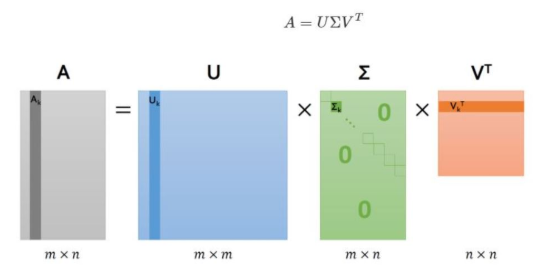

In [24]:
from sklearn.decomposition import TruncatedSVD

In [30]:
SVD = TruncatedSVD(n_components=12) # latent 값 = 12
matrix = SVD.fit_transform(movie_user_rating)

n_components = 12로 설정하면서 9064개의 영화 데이터가 12개의 어떤 요소의 값을 갖게 된다.

이렇게 나온 데이터끼리 피어슨 상관계수를 구해보자

In [31]:
corr = np.corrcoef(matrix)
corr.shape

(9064, 9064)

이 상관관계 중에서 '특정 영화'와 관련하여 상관계수가 높은 영화를 뽑아주면 된다.

In [35]:
movie_title = user_movie_rating.columns
movie_title_list = list(movie_title)
coffey_hands = movie_title_list.index('Guardians of the Galaxy (2014)')

In [39]:
corr_coffey_hands = corr[coffey_hands]
list(movie_title[corr_coffey_hands >= 0.9])[:10]

['10,000 BC (2008)',
 '2 Guns (2013)',
 '2012 (2009)',
 '21 (2008)',
 '300: Rise of an Empire (2014)',
 'Abduction (2011)',
 'Adjustment Bureau, The (2011)',
 'Adventures of Tintin, The (2011)',
 'Alice in Wonderland (2010)',
 'Amazing Spider-Man, The (2012)']

이 모델은 사용자가 본 history를 생각하지 않은 결과이기 때문에 사용자에게 추천하기 부족하다.

# 3. 사용자 history기반 추천

In [8]:
df_user_movie_ratings = rating_data.pivot(
    index='userId',
    columns='movieId',
    values='rating').fillna(0)

In [10]:
df_user_movie_ratings.shape
# N X M  = 671 사용자 X 9066 영화

(671, 9066)

In [11]:
matrix = df_user_movie_ratings.as_matrix()

# 사용자의 평균 평점
user_ratings_mean = np.mean(matrix, axis=1)

# R_user_mean : 사용자-영화에 대해 사용자 평균 평점을 뺀 것
matrix_user_mean = matrix - user_ratings_mean.reshape(-1, 1)

C:\python\envs\cpu_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [13]:
pd.DataFrame(matrix_user_mean, columns=df_user_movie_ratings.columns).head()
# 마이너스 값도 나오게 된다.

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,...,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625
1,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,3.970770,...,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230
2,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,...,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075
3,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,3.902162,...,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838
4,-0.043128,-0.043128,3.956872,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,...,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128


이제 SVD, 특이값 행렬 분해를 통해 latent factor matrix factorization을 진행해보자.

truncated svd는 svd의 변형이다.

In [14]:
from scipy.sparse.linalg import svds

In [16]:
U, sigma, Vt = svds(matrix_user_mean, k = 12)
print(U.shape, sigma.shape, Vt.shape)

(671, 12) (12,) (12, 9066)


위와 같이 진행한다면, sigma가 포함된 행렬은 0이 아닌 값만 1차원 행렬로 표현된 상태이다. 따라서 0이 포함된 대칭행렬로 변환할 때는 numpy의 diag를 이용하자.

In [17]:
sigma = np.diag(sigma)
sigma.shape

(12, 12)

SVD를 적용해 분해한 상태이므로, 다시 원본 행렬로 복구시키자.

1 ) U, sigma, Vt의 내적 수행

= np.dot(np.dot(U, sigma), Vt)

2 ) 사용자 평균을 다시 더해주기

user_ratings_mean.reshape(-1, 1)

In [24]:
svd_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = df_user_movie_ratings.columns)
df_svd_preds.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,-0.079686,0.021779,-0.013837,-0.005870,-0.028877,0.032371,0.000715,-0.004428,-0.005219,0.038195,...,-0.004324,-0.004352,0.010478,-0.004256,-0.003944,-0.005674,0.018157,-0.005575,-0.005297,-0.003766
1,1.428452,1.608841,0.529476,0.168278,0.520809,1.107473,0.529719,0.089376,0.296270,1.970031,...,0.013227,-0.002275,0.020680,-0.005245,-0.007644,-0.021019,0.031243,-0.000957,-0.000753,0.026901
2,0.977246,0.396971,0.000299,0.027444,0.021287,0.141458,-0.057134,0.031633,-0.012538,0.383576,...,0.002761,0.004907,-0.014190,-0.000251,-0.006007,-0.003189,-0.026916,0.014637,0.013287,-0.005741
3,1.870844,1.169993,0.252202,0.094831,-0.181713,-0.511953,-0.027820,-0.143080,0.013247,1.461694,...,0.026412,-0.027245,0.054681,0.018450,0.034544,-0.035740,0.088889,-0.019365,-0.017113,0.066559
4,1.182777,0.924903,0.075998,0.061505,0.602680,-0.159825,0.339925,0.081534,-0.079666,0.535018,...,-0.029124,-0.029357,0.009064,-0.029092,-0.030890,-0.057453,0.026344,-0.024027,-0.024614,-0.032752


함수 생성

* 인자로 사용자 아이디, 영화 정보 테이블, 평점 테이블 등을 받음
* 사용자 아이디에 SVD로 나온 결과의 영화 평점이 가장 높은 데이터 순으로 정렬
* 사용자가 본 데이터 제외
* 사용자가 안 본 영화에서 평점이 높은 것 추천

In [34]:
def recommend_movies(df_svd_preds, user_id, ori_movies_df, ori_ratings_df, num_recommendations=5) :
    
    # 현재 index로 적용되어 있어서 user_id -1
    user_row_number = user_id -1
    
    # 최종 predict에서 사용자 index에 따라 영화 데이터 정렬
    # 영화 평점 높은순으로 정렬
    sorted_user_predictions = df_svd_preds.iloc[user_row_number].sort_values(ascending=False)
    
    # 원본 평점 데이터에서 user id에 해당하는 데이터 추출
    user_data = ori_ratings_df[ori_ratings_df.userId == user_id]
    
    # user_data와 원본 데이터 합하기
    user_history = user_data.merge(ori_movies_df, on='movieId').sort_values(['rating'], ascending=False)

    # 원본 영화 데이터에서 사용자가 본 영화 데이터를 제외한 데이터 추출
    recommendations = ori_movies_df[-ori_movies_df['movieId'].isin(user_history['movieId'])]
    
    # 사용자의 영화 평점이 높은 순으로 정렬된 데이터와 recommendations 합하기
    recommendations = recommendations.merge(pd.DataFrame(sorted_user_predictions).reset_index(), on='movieId')

    # 컬럼 이름 바꾸고 정렬해서 return
    recommendations = recommendations.rename(columns={user_row_number : 'Predictions'}).sort_values('Predictions')
    
    return user_history, recommendations

In [36]:
already_rated, predictions = recommend_movies(df_svd_preds, 330, movie_data, rating_data, 10)

movieId
318     2.078816
296     2.060064
593     1.927825
356     1.772814
527     1.663605
          ...   
2140   -0.148684
7373   -0.150847
1215   -0.175392
2005   -0.219911
3033   -0.221206
Name: 329, Length: 9066, dtype: float64

,userId,movieId,rating
45916,330,16,3.0
45917,330,22,3.0
45918,330,25,3.0
45919,330,32,4.0
45920,330,41,5.0
...,...,...,...
46006,330,3100,4.0
46007,330,3246,4.0
46008,330,3256,3.0
46009,330,3258,2.0


,userId,movieId,rating,title,genres
47,330,1094,5.0,"Crying Game, The (1992)",Drama|Romance|Thriller
14,330,213,5.0,Burnt by the Sun (Utomlyonnye solntsem) (1994),Drama
34,330,527,5.0,Schindler's List (1993),Drama|War
45,330,1035,5.0,"Sound of Music, The (1965)",Musical|Romance
48,330,1172,5.0,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
...,...,...,...,...,...
70,330,1777,1.0,"Wedding Singer, The (1998)",Comedy|Romance
57,330,1407,1.0,Scream (1996),Comedy|Horror|Mystery|Thriller
43,330,1028,1.0,Mary Poppins (1964),Children|Comedy|Fantasy|Musical
41,330,924,1.0,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi


,movieId,title,genres,329
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.012567
1,2,Jumanji (1995),Adventure|Children|Fantasy,0.448386
2,3,Grumpier Old Men (1995),Comedy|Romance,0.278312
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0.072011
4,5,Father of the Bride Part II (1995),Comedy,0.248104
...,...,...,...,...
8966,161944,The Last Brickmaker in America (2001),Drama,0.010319
8967,162376,Stranger Things,Drama,-0.032435
8968,162542,Rustom (2016),Romance|Thriller,0.007399
8969,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,0.007130


In [35]:
already_rated.head(5)

,userId,movieId,rating,title,genres
47,330,1094,5.0,"Crying Game, The (1992)",Drama|Romance|Thriller
14,330,213,5.0,Burnt by the Sun (Utomlyonnye solntsem) (1994),Drama
34,330,527,5.0,Schindler's List (1993),Drama|War
45,330,1035,5.0,"Sound of Music, The (1965)",Musical|Romance
48,330,1172,5.0,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
